In [25]:
import torchvision
import torchvision.transforms as transforms 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [26]:
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True, download = True, transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False, download = True, transform = transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True) 
testing_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = True)


In [27]:
def showImage(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

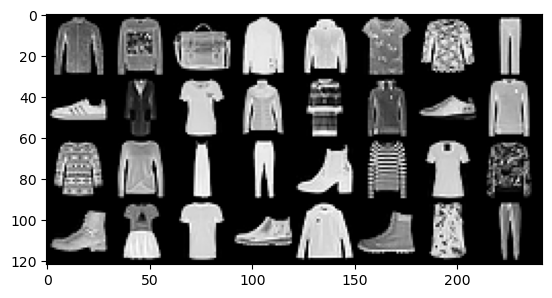

tensor([6, 2, 8, 2, 4, 0, 6, 1, 7, 4, 0, 4, 4, 4, 7, 2, 2, 2, 3, 1, 9, 2, 0, 2,
        9, 3, 0, 9, 2, 9, 6, 1])


In [28]:
images, label = next(iter(training_loader))
showImage(torchvision.utils.make_grid(images))
print((label))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
class IdentifyCloth(nn.Module):
  def __init__(self):
    super(IdentifyCloth, self).__init__()
    # network with cnn and ReLU as activation function 
    # self.cnn_model = nn.Sequential(nn.Conv2d(1,32, kernel_size = 5),nn.ReLU(),nn.MaxPool2d(kernel_size = 2, stride = 2),
    #                                nn.Conv2d(32,64,kernel_size = 5),nn.ReLU(),nn.MaxPool2d(kernel_size = 2, stride = 2))
    # self.fully_connected =  nn.Sequential(nn.Linear(64*4*4, 1024), nn.ReLU(), nn.Linear(1024,256), nn.ReLU(), nn.Linear(256, 10))
    
    # network with cnn and Tanh as activation function 
    # self.cnn_model = nn.Sequential(nn.Conv2d(1,32, kernel_size = 5),nn.Tanh(),nn.MaxPool2d(kernel_size = 2, stride = 2),
    #                                nn.Conv2d(32,64,kernel_size = 5),nn.Tanh(),nn.MaxPool2d(kernel_size = 2, stride = 2))
    # self.fully_connected =  nn.Sequential(nn.Linear(64*4*4, 1024), nn.Tanh(), nn.Linear(1024,256), nn.Tanh(), nn.Linear(256, 10))
    
    # network with cnn and Sigmod as activation function 
    # self.cnn_model = nn.Sequential(nn.Conv2d(1,32, kernel_size = 5),nn.Sigmoid(),nn.MaxPool2d(kernel_size = 2, stride = 2),
    #                                nn.Conv2d(32,64,kernel_size = 5),nn.Sigmoid(),nn.MaxPool2d(kernel_size = 2, stride = 2))
    # self.fully_connected =  nn.Sequential(nn.Linear(64*4*4, 1024), nn.Sigmoid(), nn.Linear(1024,256), nn.Sigmoid(), nn.Linear(256, 10))

    # network with cnn and ELU as activation function 
    # self.cnn_model = nn.Sequential(nn.Conv2d(1,32, kernel_size = 5),nn.ELU(),nn.MaxPool2d(kernel_size = 2, stride = 2),
    #                                nn.Conv2d(32,64,kernel_size = 5),nn.ELU(),nn.MaxPool2d(kernel_size = 2, stride = 2))
    # self.fully_connected =  nn.Sequential(nn.Linear(64*4*4, 1024), nn.ELU(), nn.Linear(1024,256), nn.ELU(), nn.Linear(256, 10))

    # network with cnn and ReLU as activation function with a drop in second fully connected layer.
    self.cnn_model = nn.Sequential(nn.Conv2d(1,32, kernel_size = 5),nn.ReLU(),nn.MaxPool2d(kernel_size = 2, stride = 2),
                                   nn.Conv2d(32,64,kernel_size = 5),nn.ReLU(),nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.fully_connected =  nn.Sequential(nn.Linear(64*4*4, 1024), nn.ReLU(), nn.Linear(1024,256),nn.Dropout(p=0.2), nn.ReLU(), nn.Linear(256, 10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.reshape(-1, 64*4*4)
    x = self.fully_connected(x)
    return x
def initWeight(layer):
  if isinstance(layer, nn.Linear):
    nn.init.xavier_uniform_(layer.weight, gain=1.0)
    # nn.init.normal_(layer.weight, 0.5, 2)


def evaluation(dataloader):
  total, correct = 0,0
  model.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

model = IdentifyCloth().to(device)
calculate_loss = nn.CrossEntropyLoss()
model.apply(initWeight)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

max_epoch = 50
loss_epoch_array = []
loss_epoch = 0
train_accuracy = []
valid_accuracy = []

for epoch in range(max_epoch):
  loss_epoch = 0
  for i, data in enumerate(training_loader, 0):
    model.train()
    input, label = data
    input, label = input.to(device), label.to(device)
    optimizer.zero_grad()
    output = model(input)
    loss = calculate_loss(output, label)
    loss.backward()
    optimizer.step()
    loss_epoch += loss.item()
  loss_epoch_array.append(loss_epoch)
  train_accuracy.append(evaluation(training_loader))
  valid_accuracy.append(evaluation(testing_loader))
  print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))
    

Epoch 1: loss: 966.7649485394359, train accuracy: 87.07166666666667, valid accuracy:86.2
Epoch 2: loss: 605.3131243307143, train accuracy: 89.36, valid accuracy:88.21
Epoch 3: loss: 521.9221151806414, train accuracy: 91.235, valid accuracy:89.67
Epoch 4: loss: 465.52466428279877, train accuracy: 92.425, valid accuracy:90.11
Epoch 5: loss: 417.6629266832024, train accuracy: 92.58666666666667, valid accuracy:89.95
Epoch 6: loss: 380.015226601623, train accuracy: 93.59666666666666, valid accuracy:90.88
Epoch 7: loss: 343.1380194798112, train accuracy: 94.20833333333333, valid accuracy:90.56
Epoch 8: loss: 313.95559737365693, train accuracy: 94.91666666666667, valid accuracy:90.89
Epoch 9: loss: 283.42601478658617, train accuracy: 95.32666666666667, valid accuracy:91.0
Epoch 10: loss: 260.235350870993, train accuracy: 96.04833333333333, valid accuracy:91.3
Epoch 11: loss: 235.7210852052085, train accuracy: 96.63, valid accuracy:91.28
Epoch 12: loss: 215.38577199308202, train accuracy: 96.5

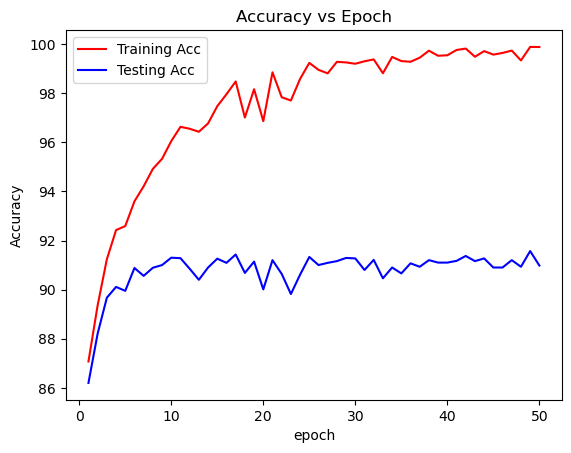

In [30]:
plt.plot(range(1,51), train_accuracy, 'r', label = 'Training Acc')
plt.plot(range(1,51), valid_accuracy, 'b', label = 'Testing Acc')
plt.title('Accuracy vs Epoch')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()